### Esemble Learning
#### **Dane do analizy :** MNIST.csv (Modified National Institute of Standards and Technology database)
#### **Cel badania :** Rozpoznanie i klasyfikacji znaków ręcznie napisanych.
#### **Klasyfikator :** Decision tree, RF, ExtraTree, XGBoost (Improved GradientBoosting)

##### Zadanie 1 : Ładowanie zbioru treningowego i testowego i dodawanie nazw dla kolumn

In [4]:
import pandas as pd

# Dodać nazwy kolumn: class, pixel1, pixel2,...pixel 784
column_names = [0 for i in range(785)]
column_names[0] = 'class'
for i in range(1, 785):
    column_names[i] = "pixel" + str(i)
df_train = pd.read_csv('mnist_train.csv', header=None, names=column_names)
df_test = pd.read_csv('mnist_test.csv', header=None, names=column_names)

# Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
X_train = df_train.iloc[:, 1:785]
y_train = df_train.iloc[:, 0]
X_test = df_test.iloc[:, 1:785]
y_test = df_test.iloc[:, 0]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# wyznaczyć rozkład kategorii (w procentach)
train_counts = y_train.value_counts().sort_index()
category_dis_train = ((train_counts / train_counts.sum()) * 100)
print("Train category distribution percentage:\n", category_dis_train)
test_counts = y_test.value_counts().sort_index()
category_dis_test = ((test_counts / test_counts.sum()) * 100)
print("Test category distribution percentage:\n", category_dis_test)

Train category distribution percentage:
 class
0     9.871667
1    11.236667
2     9.930000
3    10.218333
4     9.736667
5     9.035000
6     9.863333
7    10.441667
8     9.751667
9     9.915000
Name: count, dtype: float64
Test category distribution percentage:
 class
0     9.80
1    11.35
2    10.32
3    10.10
4     9.82
5     8.92
6     9.58
7    10.28
8     9.74
9    10.09
Name: count, dtype: float64


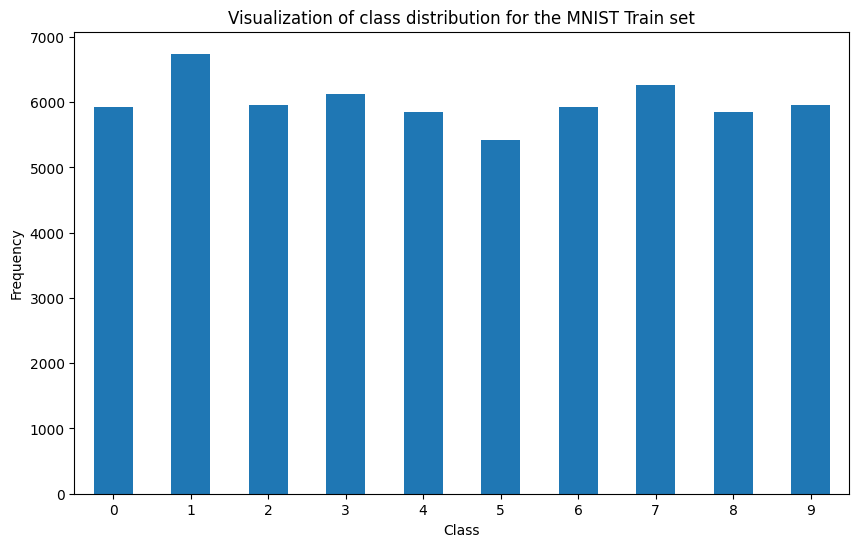

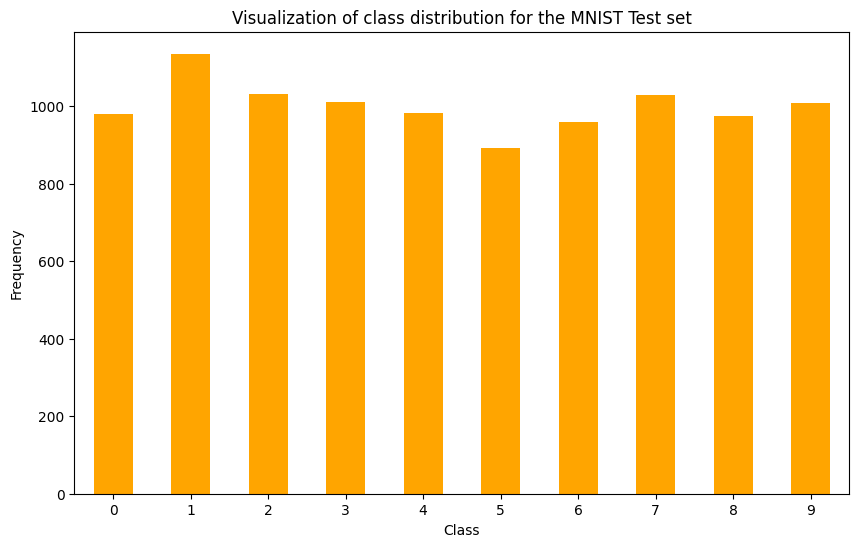

In [8]:
from matplotlib import pyplot as plt

# Narysowanie posortowanego wykresu słupkowego dla rozkładu kategorii zbioru treningowego
plt.figure(figsize=(10, 6))
train_counts.sort_index().plot(kind='bar')
plt.title('Visualization of class distribution for the MNIST Train set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
# Narysowanie posortowanego wykresu słupkowego dla rozkładu kategorii zbioru testowego
plt.figure(figsize=(10, 6))
test_counts.plot(kind='bar', color='orange')
plt.title('Visualization of class distribution for the MNIST Test set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

##### Zadanie 2 : Wizualizacja 8 pierwszych liter w zbiorze uczącym i 8 pierwszych w zbiorze testowym.

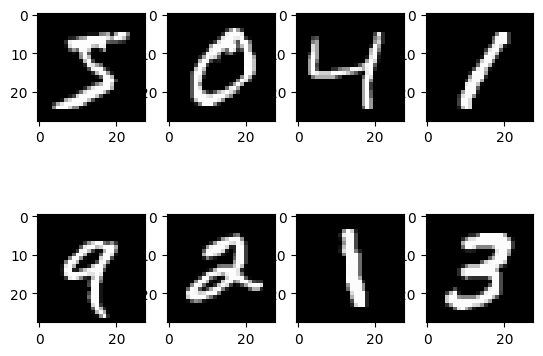

In [9]:
for i in range(8):
     # define subplot
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_train.iloc[i, :]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28, 28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
plt.show()

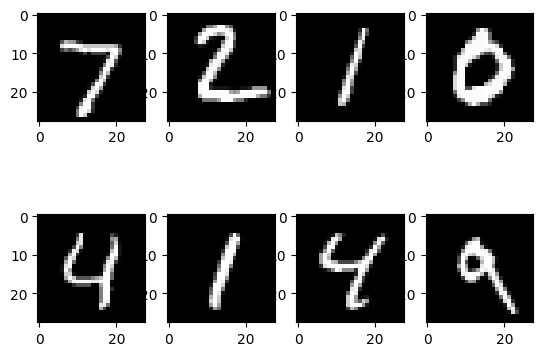

In [10]:
for i in range(8):
     # define subplot
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_test.iloc[i, :]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28, 28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
plt.show()

##### Zadanie 3 : Tworzenie klasyfikatora Decision tree.

In [9]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
# Zadanie 4 : Optymalizacja hyperparametrów DT.
# criterion = gini
dt_clf_gini = DecisionTreeClassifier(max_depth=5, criterion='gini')
dt_clf_gini.fit(X_train, y_train)
gini_predictions = dt_clf_gini.predict(X_test)
gini_accuracy = accuracy_score(y_test, gini_predictions)
print("Gini  Accuracy: ", gini_accuracy)
# criterion = entropy
dt_clf_entropy = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt_clf_entropy.fit(X_train, y_train)
entropy_predictions = dt_clf_entropy.predict(X_test)
entropy_accuracy = accuracy_score(y_test, entropy_predictions)
print("Entropy Accuracy: ", entropy_accuracy)


Gini  Accuracy:  0.6747
Entropy Accuracy:  0.6995


##### Zadanie 5 : Użyć GridSearchCV do wyszukiwania optymalnych hyperparametrów DT.

In [10]:
param_grid = {
    'max_depth': [None, 2, 6, 10, 16],
    'criterion': ['log_loss', 'entropy']
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_params = grid_search_dt.best_params_
print("Best parameters:", best_params)

dt_clf = DecisionTreeClassifier(**best_params)
start_time = time.time()
dt_clf.fit(X_train, y_train)
end_time = time.time()
predictions = dt_clf.predict(X_test)

training_time = end_time - start_time
accuracy = accuracy_score(y_test, predictions)
print("DT accuracy:", accuracy)
print("Training time: ", training_time)


Best parameters: {'criterion': 'entropy', 'max_depth': None}
DT accuracy: 0.8864
Training time:  9.094825983047485


##### Zadanie 6 : Trenować zespół klasyfikatorów RandomForest z optymalizacją parametrów: liczba drzew, liczba atrybutów.


In [5]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': [None, 'sqrt', 'log2']
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params = grid_search_rf.best_params_
print("Best parameters:", best_params)

rf_clf = RandomForestClassifier(**best_params)
start_time = time.time()
rf_clf.fit(X_train, y_train)
end_time = time.time()
predictions = rf_clf.predict(X_test)

training_time = end_time - start_time
accuracy = accuracy_score(y_test, predictions)
print("RF accuracy:", accuracy)
print("Training time: ", training_time)

Best parameters: {'max_features': 'sqrt', 'n_estimators': 200}
RF accuracy: 0.9705
Training time:  52.79489302635193


##### Zadanie 7 : Trenować zespół klasyfikatorów ExtraTree z optymalizacją parametrów.
1. Wybór Podziałów:
    W Extra Trees, podziały są wybierane bardziej losowo. Dla każdego podziału, algorytm losowo wybiera punkt podziału dla każdej cechy, a następnie wybiera z tych podziałów ten, który najlepiej dzieli dane. W przeciwieństwie do RF Nie szuka optymalnego punktu podziału dla każdej cechy.
2. Próbkowanie Bootstrapping:
    Zwykle korzysta z całego oryginalnego zestawu danych do trenowania każdego drzewa, zamiast próbkowania bootstrapping (jak w RF).


In [6]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': [None, 'sqrt', 'log2']
}
et = ExtraTreesClassifier()
grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_et.fit(X_train, y_train)
best_params = grid_search_et.best_params_
print("Best parameters:", best_params)

et_clf = ExtraTreesClassifier(**best_params)
start_time = time.time()
et_clf.fit(X_train, y_train)
end_time = time.time()
predictions = et_clf.predict(X_test)

training_time = end_time - start_time
accuracy = accuracy_score(y_test, predictions)
print("ET accuracy:", accuracy)
print("Training time: ", training_time)

Best parameters: {'max_features': 'sqrt', 'n_estimators': 200}
ET accuracy: 0.9743
Training time:  39.31225800514221


#### Zadanie 8 : Trenować zespół klasyfikatorów XGBoost z optymalizacją parametrów.

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

param_grid = {
    'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.01, 0.1, 0.2]
}

xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
best_params = grid_search_xgb.best_params_
print("Best parameters:", best_params)

xgb_clf = XGBClassifier(**best_params)
start_time = time.time()
xgb_clf.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
predictions = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("XGBoost accuracy:", accuracy)
print("Training time: ", training_time)
      

Best parameters: {'learning_rate': 0.2, 'n_estimators': 200}
XGBoost accuracy: 0.9806
Training time:  197.33163809776306


#### Summary:
1. **Best Accuracy: XGBoost : 0.98**
2. Best Parameters: 
- max_depth : None,</center>
- criterion: entropy,
- max_features : sqrt,
- n_estimators : 200,
- learning_rate: 0.2
3. Training Time (seconds):   
Decision Tree : 9.09
Random Forest : 52.79
Extra Trees : 39.31
XGBoost: 197.33

Conclusion: 
Due to accuracy, XGBoost is the best classifier. However, if faster training times are more important, Extra Trees or Random Forest may be better options.
                    